In [1]:
import pandas as pd
import sklearn
import numpy as np
from joblib import dump, load

In [2]:
import joblib
#joblib.__version__
#pd.__version__
sklearn.__version__

'1.0.2'

In [3]:
def confusion_matrix_relaxed(confusion_matrix_temp):
    # returns the relative number of predictions which are
    # +/- 1 compared to the actual result should be provided.
    i_cnt = confusion_matrix_temp.shape[0]
    j_cnt = confusion_matrix_temp.shape[1]
    bin_matrix_temp = confusion_matrix_temp.copy()
    for i in range(0, i_cnt):
        for j in range(0, j_cnt):
            if (abs(i-j)==1):
                bin_matrix_temp[i,j] = abs(i-j)
            else:
                bin_matrix_temp[i,j] = 0
    return ((confusion_matrix_temp*bin_matrix_temp).sum()) / (confusion_matrix_temp.sum())

In [4]:
def confusion_matrix_perc(confusion_matrix_temp):
    # returns the relative number of predictions which are
    # on main diagonal compared to the actual result should be provided.
    i_cnt = confusion_matrix_temp.shape[0]
    j_cnt = confusion_matrix_temp.shape[1]
    return ((confusion_matrix_temp*np.eye(i_cnt)).sum()) / (confusion_matrix_temp.sum())
    

In [5]:
# Load Models

#modelRF_lrgen = load('./models/gsRFC_lrgen_CART_fulltarget.joblib')
#modelRFreduced_lrgen = load('./models/gsRFC_lrgen_CART_reducedtarget_4l3c4r.joblib')
#modelRF_lrecon = load('./models/gsRFC_lrecon_CART_fulltarget.joblib')
#modelRFreduced_lrecon = load('./models/gsRFC_lrecon_CART_reducedtarget_4l3c4r.joblib')
#modelRF_galtan = load('./models/gsRFC_galtan_CART_fulltarget.joblib')
#modelRFreduced_galtan = load('./models/gsRFC_galtan_CART_reducedtarget_4l3c4r.joblib')

modelRF_lrgen = load('./models/gsRFC_lrgen_fulltarget_NoImputation.joblib')
modelRFreduced_lrgen = load('./models/gsRFC_lrgen_reducedtarget_4l3c4r_NoImputation.joblib')
modelRF_lrecon = load('./models/gsRFC_lrecon_fulltarget_NoImputation.joblib')
modelRFreduced_lrecon = load('./models/gsRFC_lrecon_reducedtarget_4l3c4r_NoImputation.joblib')
modelRF_galtan = load('./models/gsRFC_galtan_fulltarget_NoImputation.joblib')
modelRFreduced_galtan = load('./models/gsRFC_galtan_reducedtarget_4l3c4r_NoImputation.joblib')

In [6]:
# Load Test Datasets
testRF_lrgen = pd.read_csv('data/base_data/data_lrgen_base_X_test.csv', index_col = 0)
testRFreduced_lrgen = pd.read_csv('data/base_data/recategorized_4l3c4r/data_lrgen_base_X_test_recategorized.csv', index_col = 0)
testRF_lrecon = pd.read_csv('data/base_data/data_lrecon_base_X_test.csv', index_col = 0)
testRFreduced_lrecon = pd.read_csv('data/base_data/recategorized_4l3c4r/data_lrecon_base_X_test_recategorized.csv', index_col = 0)
testRF_galtan = pd.read_csv('data/base_data/data_galtan_base_X_test.csv', index_col = 0)
testRFreduced_galtan = pd.read_csv('data/base_data/recategorized_4l3c4r/data_galtan_base_X_test_recategorized.csv', index_col = 0)


testRF_lrgen_target = pd.read_csv('data/base_data/data_lrgen_base_y_test.csv', index_col = 0)
testRFreduced_lrgen_target = pd.read_csv('data/base_data/recategorized_4l3c4r/data_lrgen_base_y_test_recategorized.csv', index_col = 0)
testRF_lrecon_target = pd.read_csv('data/base_data/data_lrecon_base_y_test.csv', index_col = 0)
testRFreduced_lrecon_target = pd.read_csv('data/base_data/recategorized_4l3c4r/data_lrecon_base_y_test_recategorized.csv', index_col = 0)
testRF_galtan_target = pd.read_csv('data/base_data/data_galtan_base_y_test.csv', index_col = 0)
testRFreduced_galtan_target = pd.read_csv('data/base_data/recategorized_4l3c4r/data_galtan_base_y_test_recategorized.csv', index_col = 0)

In [7]:
testRF_lrgen

,econ_interven,environment,redistribution,civlib_laworder,immigrate_policy,sociallifestyle
2569,1.0,7.0,2.0,4.0,2.0,3.0
3605,1.0,9.0,1.0,2.0,1.0,1.0
2120,3.0,5.0,3.0,10.0,9.0,4.0
1311,4.0,6.0,2.0,8.0,7.0,6.0
3600,1.0,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...
1543,2.0,7.0,3.0,7.0,9.0,6.0
751,9.0,9.0,9.0,3.0,7.0,4.0
1632,4.0,3.0,3.0,2.0,4.0,3.0
410,3.0,5.0,4.0,1.0,4.0,2.0


# RF full target space: lrgen

In [21]:
# econ_interven 	environment 	redistribution 	civlib_laworder 	immigrate_policy 	sociallifestyle
test_X = testRF_lrgen
test_y = testRF_lrgen_target

In [22]:
test_X

,econ_interven,environment,redistribution,civlib_laworder,immigrate_policy,sociallifestyle
2569,1.0,7.0,2.0,4.0,2.0,3.0
3605,1.0,9.0,1.0,2.0,1.0,1.0
2120,3.0,5.0,3.0,10.0,9.0,4.0
1311,4.0,6.0,2.0,8.0,7.0,6.0
3600,1.0,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...
1543,2.0,7.0,3.0,7.0,9.0,6.0
751,9.0,9.0,9.0,3.0,7.0,4.0
1632,4.0,3.0,3.0,2.0,4.0,3.0
410,3.0,5.0,4.0,1.0,4.0,2.0


In [23]:
### Write several scores to the output ###

RMSE = True
model_vector = [modelRF_lrgen]
for model in model_vector:
    print(model.estimator.named_steps)
    print('Accuracy Score: ', sklearn.metrics.accuracy_score(test_y, model.predict(test_X)))
    print('Balanced Accuracy Score: ', sklearn.metrics.balanced_accuracy_score(test_y, model.predict(test_X)))
    print('Cohen-Kappa-Score: ', sklearn.metrics.cohen_kappa_score(test_y, model.predict(test_X)))
    print('F1-Score: ', sklearn.metrics.f1_score(test_y, model.predict(test_X), average='weighted'))
    if RMSE == True:
        print('RMSE: ', np.sqrt(sklearn.metrics.mean_squared_error(test_y, model.predict(test_X))))
        #print('ROC-AUC-Score: ', sklearn.metrics.roc_auc_score(test_y, 
        #                                                       model.predict(test_X), 
        #                                                       average='weighted', 
        #                                                       multi_class='ovo'))
    print('__________________________________\n')

for model in model_vector:
    print('Confusion matrix: \n', sklearn.metrics.confusion_matrix(test_y, model.predict(test_X)))
    print(confusion_matrix_relaxed(sklearn.metrics.confusion_matrix(test_y, model.predict(test_X))))    
    print(confusion_matrix_perc(sklearn.metrics.confusion_matrix(test_y, model.predict(test_X))))

for model in model_vector:
    print(sklearn.metrics.classification_report(test_y, model.predict(test_X)))

{'standardscaler': StandardScaler(), 'randomforestclassifier': RandomForestClassifier(criterion='entropy', random_state=1)}
Accuracy Score:  0.3771626297577855
Balanced Accuracy Score:  0.44251989631774324
Cohen-Kappa-Score:  0.30489858093481925
F1-Score:  0.36952511621345924
RMSE:  1.3542193450848632
__________________________________

Confusion matrix: 
 [[ 5  0  0  0  0  0  0  0  0  0  0]
 [ 3  9  4  2  1  0  0  0  0  0  0]
 [ 0  4 17  7  1  0  0  0  1  0  0]
 [ 0  1  9  5  3  1  3  0  0  0  0]
 [ 1  0  3  8 15  4  1  3  0  0  0]
 [ 0  0  0  5 11  9  9  5  1  0  0]
 [ 0  0  0  0  6 10 11  7  3  1  0]
 [ 0  0  0  0  1  2  7 15 12  0  0]
 [ 0  0  0  1  0  1  4  8 11  6  1]
 [ 0  0  0  0  0  0  0  1  7  3  8]
 [ 0  1  0  0  0  0  0  0  0  2  9]]
0.4463667820069204
0.3771626297577855
              precision    recall  f1-score   support

         0.0       0.56      1.00      0.71         5
         1.0       0.60      0.47      0.53        19
         2.0       0.52      0.57      0.54

<AxesSubplot:xlabel='0'>

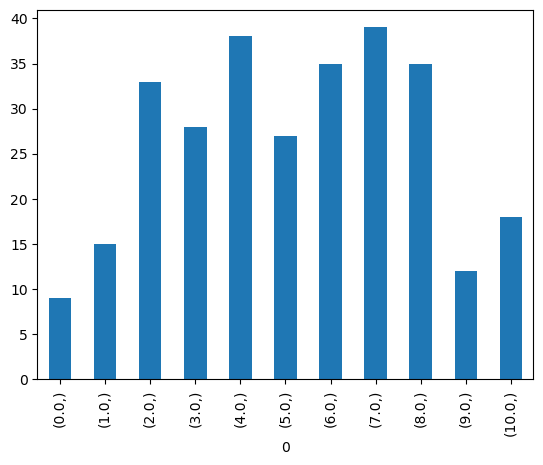

In [24]:
pd.DataFrame(model.predict(test_X)).value_counts(sort=False).plot(kind='bar')

<AxesSubplot:xlabel='lrgen_factor'>

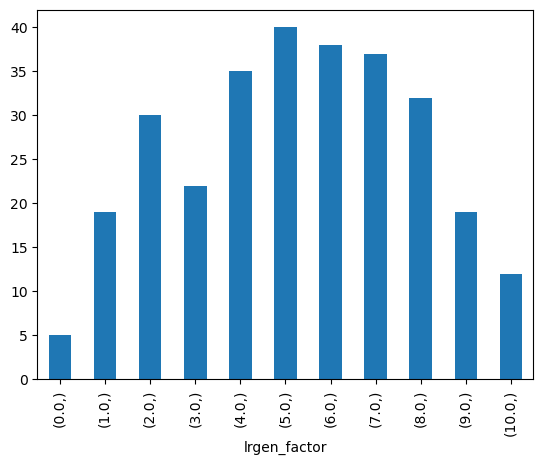

In [25]:
test_y.value_counts(sort=False).plot(kind='bar')

In [26]:
pd.Series(model.predict(test_X))

0      2.0
1      1.0
2      6.0
3      4.0
4      1.0
      ... 
284    8.0
285    8.0
286    3.0
287    4.0
288    4.0
Length: 289, dtype: float64

# RF reduced target space (4l3c4r): lrgen

In [27]:
# econ_interven 	environment 	redistribution 	civlib_laworder 	immigrate_policy 	sociallifestyle
test_X = testRFreduced_lrgen
test_y = testRFreduced_lrgen_target

In [28]:
### Write several scores to the output ###

RMSE = False
model_vector = [modelRFreduced_lrgen]
for model in model_vector:
    print(model.estimator.named_steps)
    print('Accuracy Score: ', sklearn.metrics.accuracy_score(test_y, model.predict(test_X)))
    print('Balanced Accuracy Score: ', sklearn.metrics.balanced_accuracy_score(test_y, model.predict(test_X)))
    print('Cohen-Kappa-Score: ', sklearn.metrics.cohen_kappa_score(test_y, model.predict(test_X)))
    print('F1-Score: ', sklearn.metrics.f1_score(test_y, model.predict(test_X), average='weighted'))
    if RMSE == True:
        print('RMSE: ', np.sqrt(sklearn.metrics.mean_squared_error(test_y, model.predict(test_X))))
        #print('ROC-AUC-Score: ', sklearn.metrics.roc_auc_score(test_y, 
        #                                                       model.predict(test_X), 
        #                                                       average='weighted', 
        #                                                       multi_class='ovo'))
    print('__________________________________\n')

for model in model_vector:
    print('Confusion matrix: \n', sklearn.metrics.confusion_matrix(test_y, model.predict(test_X), labels=['l', 'c', 'r']))

for model in model_vector:
    print(sklearn.metrics.classification_report(test_y, model.predict(test_X)))

{'standardscaler': StandardScaler(), 'randomforestclassifier': RandomForestClassifier(criterion='entropy', random_state=1)}
Accuracy Score:  0.8027681660899654
Balanced Accuracy Score:  0.8142338146250582
Cohen-Kappa-Score:  0.7022341925454612
F1-Score:  0.8009846056052514
__________________________________

Confusion matrix: 
 [[68  7  1]
 [17 80 16]
 [ 0 16 84]]
              precision    recall  f1-score   support

           c       0.78      0.71      0.74       113
           l       0.80      0.89      0.84        76
           r       0.83      0.84      0.84       100

    accuracy                           0.80       289
   macro avg       0.80      0.81      0.81       289
weighted avg       0.80      0.80      0.80       289



<AxesSubplot:xlabel='0'>

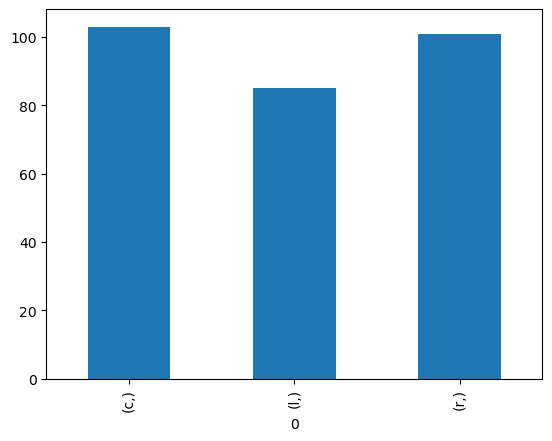

In [29]:
pd.DataFrame(model.predict(test_X)).value_counts(sort=False).plot(kind='bar')

In [30]:
#data_temp = pd.DataFrame(model.predict(test_X), test_y['lrgen_selfdescription'].values).reset_index()
#data_temp.columns = ['EVS_lrgen_predicted', 'EVS_lrgen_self']
#data_temp.to_csv('lrgen_reduced.csv')

# RF full target space: lrecon

In [32]:
# econ_interven 	environment 	redistribution 	civlib_laworder 	immigrate_policy 	sociallifestyle
test_X = testRF_lrecon
test_y = testRF_lrecon_target

In [33]:
### Write several scores to the output ###

RMSE = True
model_vector = [modelRF_lrecon]
for model in model_vector:
    print(model.estimator.named_steps)
    print('Accuracy Score: ', sklearn.metrics.accuracy_score(test_y, model.predict(test_X)))
    print('Balanced Accuracy Score: ', sklearn.metrics.balanced_accuracy_score(test_y, model.predict(test_X)))
    print('Cohen-Kappa-Score: ', sklearn.metrics.cohen_kappa_score(test_y, model.predict(test_X)))
    print('F1-Score: ', sklearn.metrics.f1_score(test_y, model.predict(test_X), average='weighted'))
    if RMSE == True:
        print('RMSE: ', np.sqrt(sklearn.metrics.mean_squared_error(test_y, model.predict(test_X))))
        #print('ROC-AUC-Score: ', sklearn.metrics.roc_auc_score(test_y, 
        #                                                       model.predict(test_X), 
        #                                                       average='weighted', 
        #                                                       multi_class='ovo'))
    print('__________________________________\n')

for model in model_vector:
    print('Confusion matrix: \n', sklearn.metrics.confusion_matrix(test_y, model.predict(test_X)))
    print(confusion_matrix_relaxed(sklearn.metrics.confusion_matrix(test_y, model.predict(test_X))))    
    print(confusion_matrix_perc(sklearn.metrics.confusion_matrix(test_y, model.predict(test_X))))

for model in model_vector:
    print(sklearn.metrics.classification_report(test_y, model.predict(test_X)))

{'standardscaler': StandardScaler(), 'randomforestclassifier': RandomForestClassifier(criterion='entropy', random_state=1)}
Accuracy Score:  0.3923611111111111
Balanced Accuracy Score:  0.4115583766768275
Cohen-Kappa-Score:  0.31615581878129195
F1-Score:  0.3855359803078141
RMSE:  1.3294213444619847
__________________________________

Confusion matrix: 
 [[ 6  3  0  1  0  0  0  0  0  0  0]
 [ 4  7  3  1  1  0  0  0  0  0  0]
 [ 1  5 14 10  0  0  0  0  0  0  0]
 [ 1  1  6 13  8  1  1  1  0  0  0]
 [ 1  0  1  6 19  2  0  0  0  0  0]
 [ 0  1  1  4 19 20 10  3  3  0  0]
 [ 0  0  1  2  1  8  7  6  5  0  0]
 [ 0  0  0  0  4  7  2  4  7  1  0]
 [ 0  0  0  0  0  2  4  6 18  6  2]
 [ 0  0  0  1  0  1  0  0  5  2  3]
 [ 0  0  0  0  0  0  0  0  0  2  3]]
0.4201388888888889
0.3923611111111111
              precision    recall  f1-score   support

         0.0       0.46      0.60      0.52        10
         1.0       0.41      0.44      0.42        16
         2.0       0.54      0.47      0.50  

<AxesSubplot:xlabel='0'>

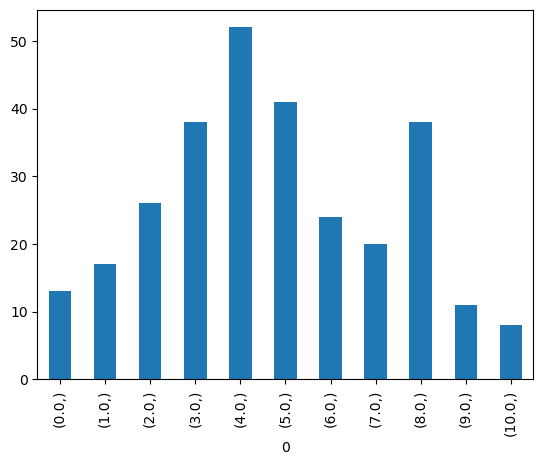

In [34]:
pd.DataFrame(modelRF_lrecon.predict(test_X)).value_counts(sort=False).plot(kind='bar')

<AxesSubplot:xlabel='lrecon_factor'>

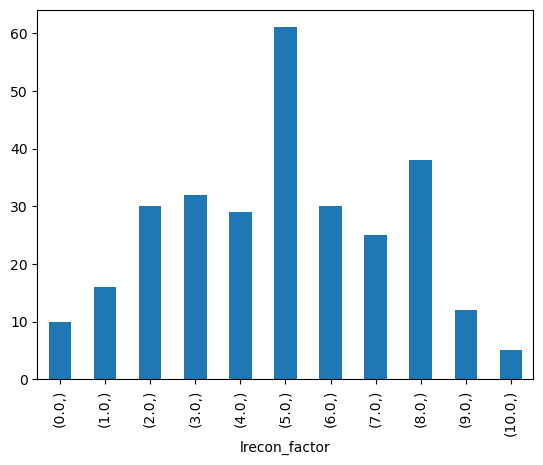

In [35]:
test_y.value_counts(sort=False).plot(kind='bar')

# RF reduced target space (4l3c4r): lrecon

In [40]:
# econ_interven 	environment 	redistribution 	civlib_laworder 	immigrate_policy 	sociallifestyle
test_X = testRFreduced_lrecon
test_y = testRFreduced_lrecon_target

In [41]:
### Write several scores to the output ###

RMSE = False
model_vector = [modelRFreduced_lrecon]
for model in model_vector:
    print(model.estimator.named_steps)
    print('Accuracy Score: ', sklearn.metrics.accuracy_score(test_y, model.predict(test_X)))
    print('Balanced Accuracy Score: ', sklearn.metrics.balanced_accuracy_score(test_y, model.predict(test_X)))
    print('Cohen-Kappa-Score: ', sklearn.metrics.cohen_kappa_score(test_y, model.predict(test_X)))
    print('F1-Score: ', sklearn.metrics.f1_score(test_y, model.predict(test_X), average='weighted'))
    if RMSE == True:
        print('RMSE: ', np.sqrt(sklearn.metrics.mean_squared_error(test_y, model.predict(test_X))))
        #print('ROC-AUC-Score: ', sklearn.metrics.roc_auc_score(test_y, 
        #                                                       model.predict(test_X), 
        #                                                       average='weighted', 
        #                                                       multi_class='ovo'))
    print('__________________________________\n')

for model in model_vector:
    print('Confusion matrix: \n', sklearn.metrics.confusion_matrix(test_y, model.predict(test_X), labels=['l', 'c', 'r']))
    print(confusion_matrix_relaxed(sklearn.metrics.confusion_matrix(test_y, model.predict(test_X))))    
    print(confusion_matrix_perc(sklearn.metrics.confusion_matrix(test_y, model.predict(test_X))))

for model in model_vector:
    print(sklearn.metrics.classification_report(test_y, model.predict(test_X)))

{'standardscaler': StandardScaler(), 'randomforestclassifier': RandomForestClassifier(criterion='entropy', random_state=1)}
Accuracy Score:  0.7673611111111112
Balanced Accuracy Score:  0.7736111111111112
Cohen-Kappa-Score:  0.6462824461064672
F1-Score:  0.7661149940355079
__________________________________

Confusion matrix: 
 [[77 11  0]
 [15 85 20]
 [ 2 19 59]]
0.09722222222222222
0.7673611111111112
              precision    recall  f1-score   support

           c       0.74      0.71      0.72       120
           l       0.82      0.88      0.85        88
           r       0.75      0.74      0.74        80

    accuracy                           0.77       288
   macro avg       0.77      0.77      0.77       288
weighted avg       0.77      0.77      0.77       288



# RF full target space: galtan

In [42]:
# econ_interven 	environment 	redistribution 	civlib_laworder 	immigrate_policy 	sociallifestyle
test_X = testRF_galtan
test_y = testRF_galtan_target

In [43]:
### Write several scores to the output ###

RMSE = True
model_vector = [modelRF_galtan]
for model in model_vector:
    print(model.estimator.named_steps)
    print('Accuracy Score: ', sklearn.metrics.accuracy_score(test_y, model.predict(test_X)))
    print('Balanced Accuracy Score: ', sklearn.metrics.balanced_accuracy_score(test_y, model.predict(test_X)))
    print('Cohen-Kappa-Score: ', sklearn.metrics.cohen_kappa_score(test_y, model.predict(test_X)))
    print('F1-Score: ', sklearn.metrics.f1_score(test_y, model.predict(test_X), average='weighted'))
    if RMSE == True:
        print('RMSE: ', np.sqrt(sklearn.metrics.mean_squared_error(test_y, model.predict(test_X))))
        #print('ROC-AUC-Score: ', sklearn.metrics.roc_auc_score(test_y, 
        #                                                       model.predict(test_X), 
        #                                                       average='weighted', 
        #                                                       multi_class='ovo'))
    print('__________________________________\n')

for model in model_vector:
    print('Confusion matrix: \n', sklearn.metrics.confusion_matrix(test_y, model.predict(test_X)))
    print(confusion_matrix_relaxed(sklearn.metrics.confusion_matrix(test_y, model.predict(test_X))))    
    print(confusion_matrix_perc(sklearn.metrics.confusion_matrix(test_y, model.predict(test_X))))

for model in model_vector:
    print(sklearn.metrics.classification_report(test_y, model.predict(test_X)))

{'standardscaler': StandardScaler(), 'randomforestclassifier': RandomForestClassifier(criterion='entropy', random_state=1)}
Accuracy Score:  0.38408304498269896
Balanced Accuracy Score:  0.3819986577846418
Cohen-Kappa-Score:  0.3231582963830376
F1-Score:  0.38397640524787996
RMSE:  1.4623297523124767
__________________________________

Confusion matrix: 
 [[18  8  0  1  0  0  0  0  0  0  0]
 [ 9 13  3  3  1  0  0  0  0  0  0]
 [ 3 11  5  6  2  1  0  0  0  0  0]
 [ 0  2  6  7  4  2  0  1  0  1  0]
 [ 1  0  5  1  7 13  2  0  0  0  0]
 [ 1  2  3  3  1  4 10  0  1  0  0]
 [ 0  0  0  1  1  4  5  2  3  1  0]
 [ 0  0  0  0  0  1 11  9  9  3  0]
 [ 0  0  0  1  1  1  3  3 16  3  1]
 [ 0  0  0  0  0  0  1  2  5 10  4]
 [ 0  1  0  0  0  0  0  0  2  7 17]]
0.41522491349480967
0.38408304498269896
              precision    recall  f1-score   support

         0.0       0.56      0.67      0.61        27
         1.0       0.35      0.45      0.39        29
         2.0       0.23      0.18      0.2

<AxesSubplot:xlabel='0'>

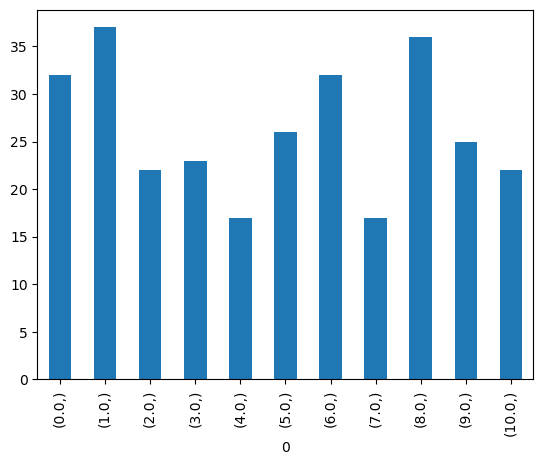

In [44]:
pd.DataFrame(modelRF_galtan.predict(test_X)).value_counts(sort=False).plot(kind='bar')

# RF reduced target space (4l3c4r): galtan

In [46]:
# econ_interven 	environment 	redistribution 	civlib_laworder 	immigrate_policy 	sociallifestyle
test_X = testRFreduced_galtan
test_y = testRFreduced_galtan_target

In [47]:
### Write several scores to the output ###

RMSE = False
model_vector = [modelRFreduced_galtan]
for model in model_vector:
    print(model.estimator.named_steps)
    print('Accuracy Score: ', sklearn.metrics.accuracy_score(test_y, model.predict(test_X)))
    print('Balanced Accuracy Score: ', sklearn.metrics.balanced_accuracy_score(test_y, model.predict(test_X)))
    print('Cohen-Kappa-Score: ', sklearn.metrics.cohen_kappa_score(test_y, model.predict(test_X)))
    print('F1-Score: ', sklearn.metrics.f1_score(test_y, model.predict(test_X), average='weighted'))
    if RMSE == True:
        print('RMSE: ', np.sqrt(sklearn.metrics.mean_squared_error(test_y, model.predict(test_X))))
        #print('ROC-AUC-Score: ', sklearn.metrics.roc_auc_score(test_y, 
        #                                                       model.predict(test_X), 
        #                                                       average='weighted', 
        #                                                       multi_class='ovo'))
    print('__________________________________\n')

for model in model_vector:
    print('Confusion matrix: \n', sklearn.metrics.confusion_matrix(test_y, model.predict(test_X), labels=['l', 'c', 'r']))

for model in model_vector:
    print(sklearn.metrics.classification_report(test_y, model.predict(test_X)))

{'standardscaler': StandardScaler(), 'randomforestclassifier': RandomForestClassifier(criterion='entropy', random_state=1)}
Accuracy Score:  0.7958477508650519
Balanced Accuracy Score:  0.779179864345061
Cohen-Kappa-Score:  0.6894284361225456
F1-Score:  0.797238812767087
__________________________________

Confusion matrix: 
 [[95 10  2]
 [17 46  8]
 [ 3 19 89]]
              precision    recall  f1-score   support

           c       0.61      0.65      0.63        71
           l       0.83      0.89      0.86       107
           r       0.90      0.80      0.85       111

    accuracy                           0.80       289
   macro avg       0.78      0.78      0.78       289
weighted avg       0.80      0.80      0.80       289

